In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [30]:
tile_data = pd.read_csv('./saved/log/CRC_Densenet121/0112_050110/tile_result.csv')
sample_data = pd.read_csv('./saved/log/CRC_Densenet121/0112_050110/sample_result.csv')


In [31]:
tile_data.dtypes

Tile_Path      object
Tile_Prob     float64
Tile_Pred       int64
Tile_Label      int64
Path           object
Barcode        object
AS_Label        int64
dtype: object

In [32]:
sample_data.dtypes

Barcode        object
Tile_Num        int64
Votes         float64
Pred            int64
True_Label      int64
AS_Label        int64
Type           object
MSI_status     object
dtype: object

In [34]:
tile_data.head()

Tile_Path  Tile_Prob  Tile_Pred  \
0  data/CRC/Test/1/blk-QWPWRNYNDWVN-TCGA-G4-6586-...   0.964799          1   
1  data/CRC/Test/1/blk-LDPHRIEFLFLG-TCGA-G4-6586-...   0.385586          0   
2  data/CRC/Test/1/blk-VHFSWGEPVKHA-TCGA-G4-6586-...   0.551571          1   
3  data/CRC/Test/1/blk-MMLSWTDGSADM-TCGA-AD-A5EJ-...   0.985587          1   
4  data/CRC/Test/1/blk-ILCEAIRMNDED-TCGA-G4-6586-...   0.592011          1   

   Tile_Label                                               Path  \
0           0  data/CRC/Test/1/blk-QWPWRNYNDWVN-TCGA-G4-6586-...   
1           0  data/CRC/Test/1/blk-LDPHRIEFLFLG-TCGA-G4-6586-...   
2           0  data/CRC/Test/1/blk-VHFSWGEPVKHA-TCGA-G4-6586-...   
3           0  data/CRC/Test/1/blk-MMLSWTDGSADM-TCGA-AD-A5EJ-...   
4           0  data/CRC/Test/1/blk-ILCEAIRMNDED-TCGA-G4-6586-...   

           Barcode  AS_Label  
0  TCGA-G4-6586-01         1  
1  TCGA-G4-6586-01         1  
2  TCGA-G4-6586-01         1  
3  TCGA-AD-A5EJ-01         1  
4  TCGA-G4-6586-01         1

In [35]:
sample_data.head()


Barcode  Tile_Num     Votes  Pred  True_Label  AS_Label  Type  \
0  TCGA-G4-6586-01       695  0.752518     0           0         1  COAD   
1  TCGA-AD-A5EJ-01       374  0.518717     0           0         1  COAD   
2  TCGA-G4-6311-01       466  0.937768     1           1        26  COAD   
3  TCGA-CM-5862-01      1367  0.702999     0           1        26  COAD   
4  TCGA-CM-5864-01      1497  0.901136     1           1        26  COAD   

  MSI_status  
0     MSIMUT  
1     MSIMUT  
2        MSS  
3        MSS  
4        MSS

In [41]:
merged_df = pd.merge(tile_data, sample_data[['Barcode', 'Pred']],  how='left', left_on=['Barcode'], right_on = ['Barcode'])
merged_df.head()

Tile_Path  Tile_Prob  Tile_Pred  \
0  data/CRC/Test/1/blk-QWPWRNYNDWVN-TCGA-G4-6586-...   0.964799          1   
1  data/CRC/Test/1/blk-LDPHRIEFLFLG-TCGA-G4-6586-...   0.385586          0   
2  data/CRC/Test/1/blk-VHFSWGEPVKHA-TCGA-G4-6586-...   0.551571          1   
3  data/CRC/Test/1/blk-MMLSWTDGSADM-TCGA-AD-A5EJ-...   0.985587          1   
4  data/CRC/Test/1/blk-ILCEAIRMNDED-TCGA-G4-6586-...   0.592011          1   

   Tile_Label                                               Path  \
0           0  data/CRC/Test/1/blk-QWPWRNYNDWVN-TCGA-G4-6586-...   
1           0  data/CRC/Test/1/blk-LDPHRIEFLFLG-TCGA-G4-6586-...   
2           0  data/CRC/Test/1/blk-VHFSWGEPVKHA-TCGA-G4-6586-...   
3           0  data/CRC/Test/1/blk-MMLSWTDGSADM-TCGA-AD-A5EJ-...   
4           0  data/CRC/Test/1/blk-ILCEAIRMNDED-TCGA-G4-6586-...   

           Barcode  AS_Label  Pred  
0  TCGA-G4-6586-01         1     0  
1  TCGA-G4-6586-01         1     0  
2  TCGA-G4-6586-01         1     0  
3  TCGA-AD-A5EJ-01         1     0  
4  TCGA-G4-6586-01         1     0

In [43]:
def tileprob_per_pred(tile_results, sample_results):
    # 2 subplots per AS - correctly / incorrectly predicted samples
    # hue by sample
    merged_df = pd.merge(tile_results, sample_results[['Barcode', 'Pred']],  how='left', left_on=['Barcode'], right_on = ['Barcode'])
    AS_list = merged_df.AS_Label.unique()
    fig, axes = plt.subplots(len(AS_list), 2, figsize=(15, len(AS_list) * 4))
    for i, AS in enumerate(AS_list):
        corrects = merged_df.loc[(merged_df['AS_Label'] == AS) & (merged_df['Pred'] == merged_df['Tile_Label'])]
        ax1 = axes[i][0]
        sns.histplot(data=corrects, x='Tile_Prob', kde=True, hue='Barcode', ax=ax1)
        ax1.set_title(f'Correct Samples (AS : {AS})', fontsize='x-large')
        ax1.set_xlabel('Tile-level Probability', fontsize='large')
        ax1.set_ylabel('Count', fontsize='large')
        ax1.tick_params(axis='both', which='major', labelsize='medium')
        ax1.set(xlim=(0.0, 1.0))

        incorrects = merged_df.loc[(merged_df['AS_Label'] == AS) & (merged_df['Pred'] != merged_df['Tile_Label'])]
        ax2 = axes[i][1]
        sns.histplot(data=incorrects, x='Tile_Prob', kde=True, hue='Barcode', ax=ax2)
        ax2.set_title(f'Incorrect Samples (AS : {AS})', fontsize='x-large')
        ax2.set_xlabel('Tile-level Probability', fontsize='large')
        ax2.set_ylabel('Count', fontsize='large')
        ax2.tick_params(axis='both', which='major', labelsize='medium')   
        ax2.set(xlim=(0.0, 1.0))
    fig.tight_layout()

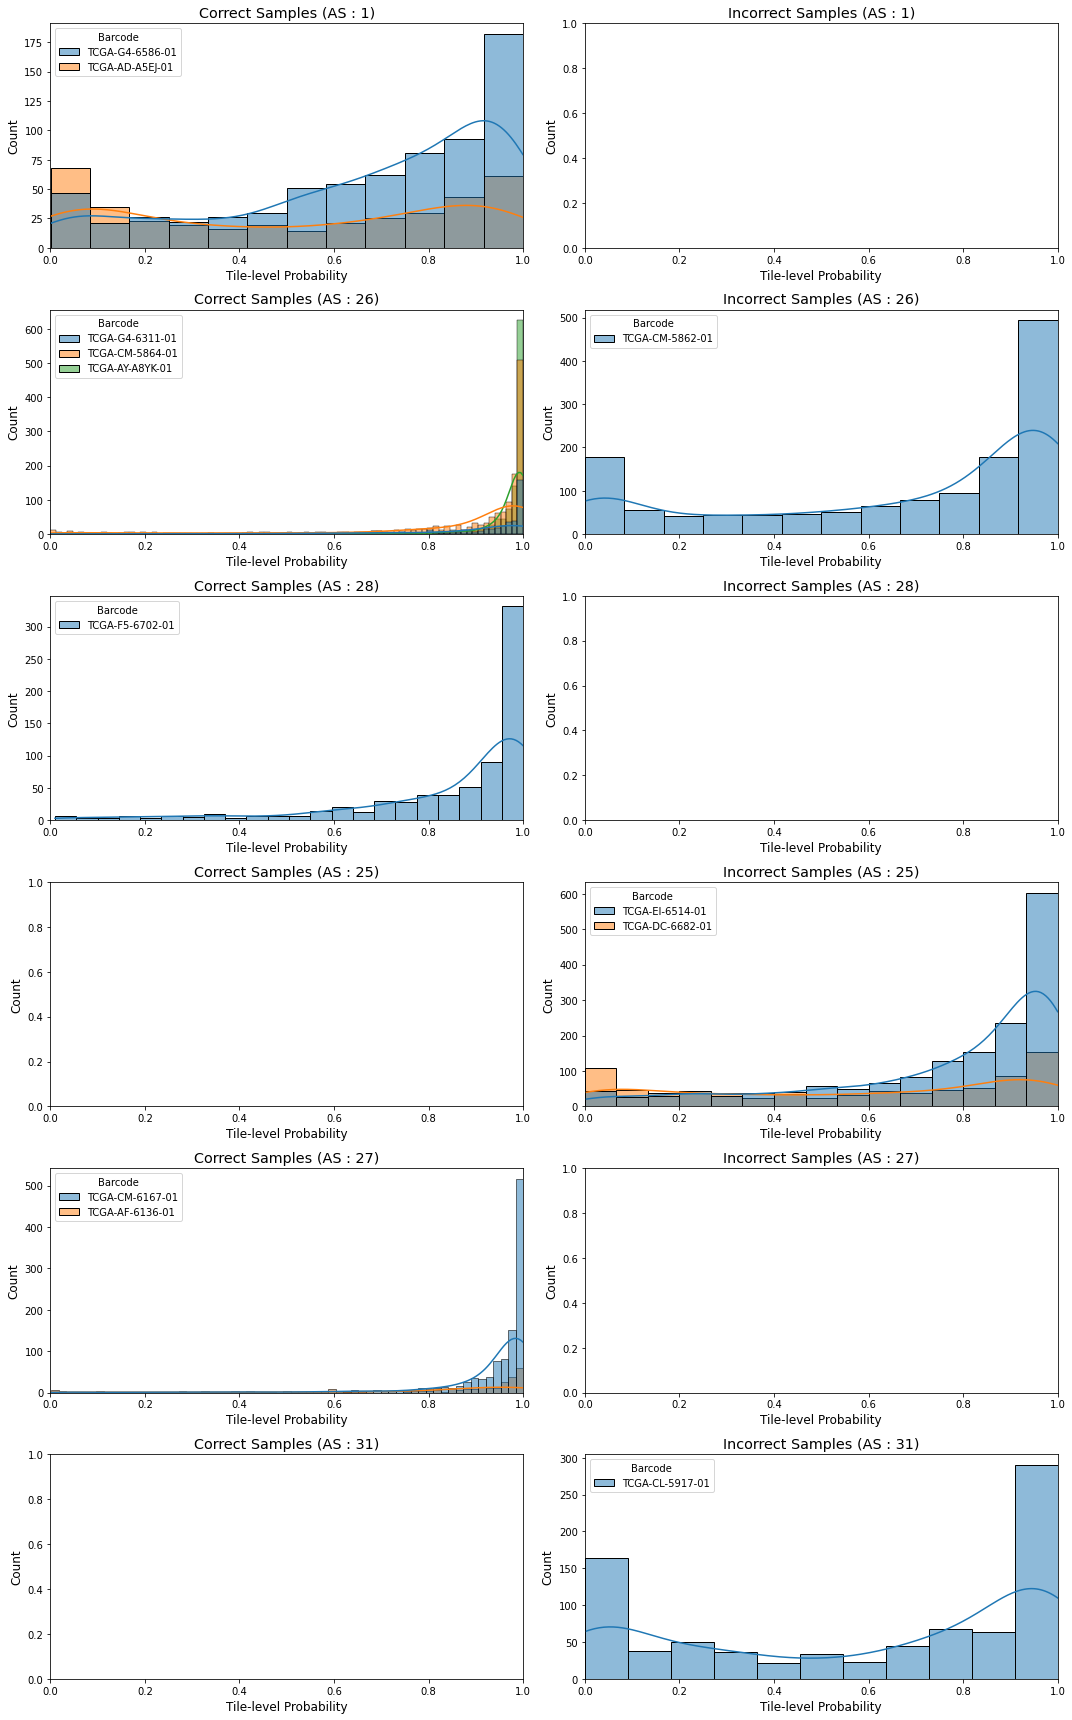

In [44]:
tileprob_per_pred(tile_data, sample_data)

# 1. AS 1-10, 11-39

In [2]:
tile_data = pd.read_csv('./saved/log/CRC_Densenet121_AS(1-10,11-39)_MSS+MSIMUT/0103_063307/tile_data.csv')
tile_data.head()

Unnamed: 0                                          tile_path  tile_prob  \
0           0  data/CRC/Test/16/blk-FKWQLSWNGMTC-TCGA-DC-6154...   0.624379   
1           1  data/CRC/Test/2/blk-VICMWNRFLNCK-TCGA-CK-6746-...   0.386493   
2           2  data/CRC/Test/19/blk-VCWEAVTQTRHY-TCGA-A6-2686...   0.440867   
3           3  data/CRC/Test/3/blk-RRPRDCDETECN-TCGA-AY-6197-...   0.463163   
4           4  data/CRC/Test/1/blk-QWPWRNYNDWVN-TCGA-G4-6586-...   0.462624   

   tile_pred  tile_label  tile_AS  
0        1.0           1     16.0  
1        0.0           0      2.0  
2        0.0           1     19.0  
3        0.0           0      3.0  
4        0.0           0      1.0

In [4]:
sample_data = pd.read_csv('./saved/log/CRC_Densenet121_AS(1-10,11-39)_MSS+MSIMUT/0103_063307/sample_df(score: votes).csv')
sample_data.head()

Unnamed: 0          Barcode  AS_Label  Tile_Num     votes  Pred  True_Label
0           0  TCGA-DC-6154-01        16      1112  0.923561     1           1
1           1  TCGA-CK-6746-01         2      1906  0.241343     0           0
2           2  TCGA-A6-2686-01        19       667  0.473763     0           1
3           3  TCGA-AY-6197-01         3      1997  0.545819     0           0
4           4  TCGA-G4-6586-01         1       695  0.742446     0           0

In [5]:
# Extract barcode from tile path

tile_data['Barcode'] = tile_data['tile_path'].apply(os.path.basename)
tile_data['Barcode'] = tile_data['Barcode'].apply(lambda x : x[17:32])
tile_data.head()

Unnamed: 0                                          tile_path  tile_prob  \
0           0  data/CRC/Test/16/blk-FKWQLSWNGMTC-TCGA-DC-6154...   0.624379   
1           1  data/CRC/Test/2/blk-VICMWNRFLNCK-TCGA-CK-6746-...   0.386493   
2           2  data/CRC/Test/19/blk-VCWEAVTQTRHY-TCGA-A6-2686...   0.440867   
3           3  data/CRC/Test/3/blk-RRPRDCDETECN-TCGA-AY-6197-...   0.463163   
4           4  data/CRC/Test/1/blk-QWPWRNYNDWVN-TCGA-G4-6586-...   0.462624   

   tile_pred  tile_label  tile_AS          Barcode  
0        1.0           1     16.0  TCGA-DC-6154-01  
1        0.0           0      2.0  TCGA-CK-6746-01  
2        0.0           1     19.0  TCGA-A6-2686-01  
3        0.0           0      3.0  TCGA-AY-6197-01  
4        0.0           0      1.0  TCGA-G4-6586-01

In [6]:
merged_df = pd.merge(tile_data, sample_data,  how='left', left_on=['Barcode'], right_on = ['Barcode'])
merged_df.drop(labels=['Unnamed: 0_x', 'Unnamed: 0_y', 'tile_path', 'tile_AS'], axis=1, inplace=True)
merged_df['correct'] = np.where(merged_df['Pred'] == merged_df['True_Label'], True, False)
merged_df.head()

tile_prob  tile_pred  tile_label          Barcode  AS_Label  Tile_Num  \
0   0.624379        1.0           1  TCGA-DC-6154-01        16      1112   
1   0.386493        0.0           0  TCGA-CK-6746-01         2      1906   
2   0.440867        0.0           1  TCGA-A6-2686-01        19       667   
3   0.463163        0.0           0  TCGA-AY-6197-01         3      1997   
4   0.462624        0.0           0  TCGA-G4-6586-01         1       695   

      votes  Pred  True_Label  correct  
0  0.923561     1           1     True  
1  0.241343     0           0     True  
2  0.473763     0           1    False  
3  0.545819     0           0     True  
4  0.742446     0           0     True

In [7]:
np.unique(tile_data['tile_AS'])

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 16.,
       17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 31.])

## 1-1. Distribution of Tile-level Probability

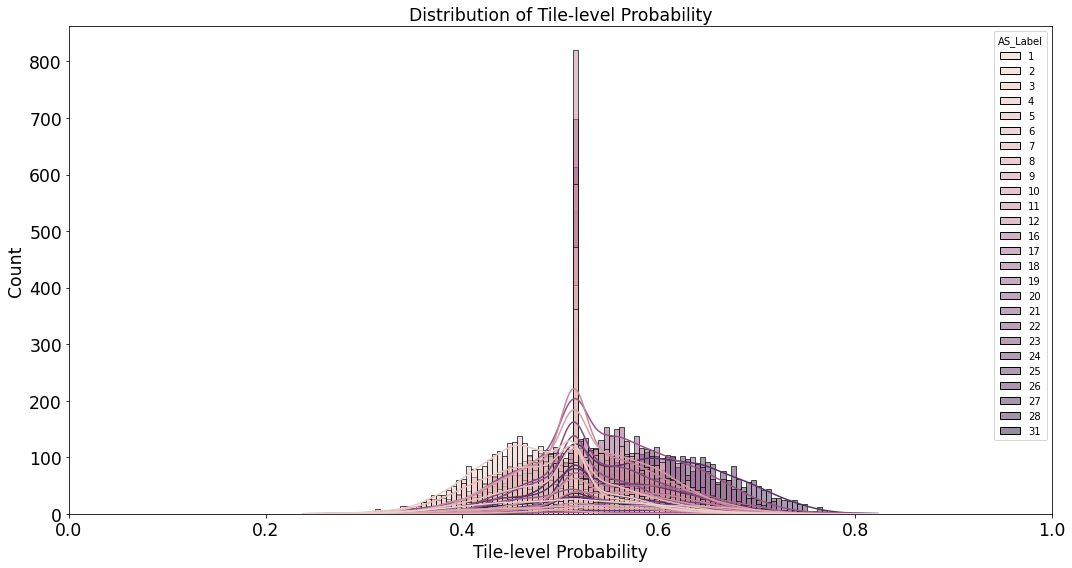

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.histplot(data=merged_df[['tile_prob', 'AS_Label']], x='tile_prob', hue='AS_Label', kde=True, ax=ax)
ax.set_title('Distribution of Tile-level Probability', fontsize='xx-large')
ax.set_xlabel('Tile-level Probability', fontsize='xx-large')
ax.set_ylabel('Count', fontsize='xx-large')
ax.tick_params(axis='both', which='major', labelsize='xx-large')
ax.set(xlim=(0.0, 1.0))
fig.tight_layout()

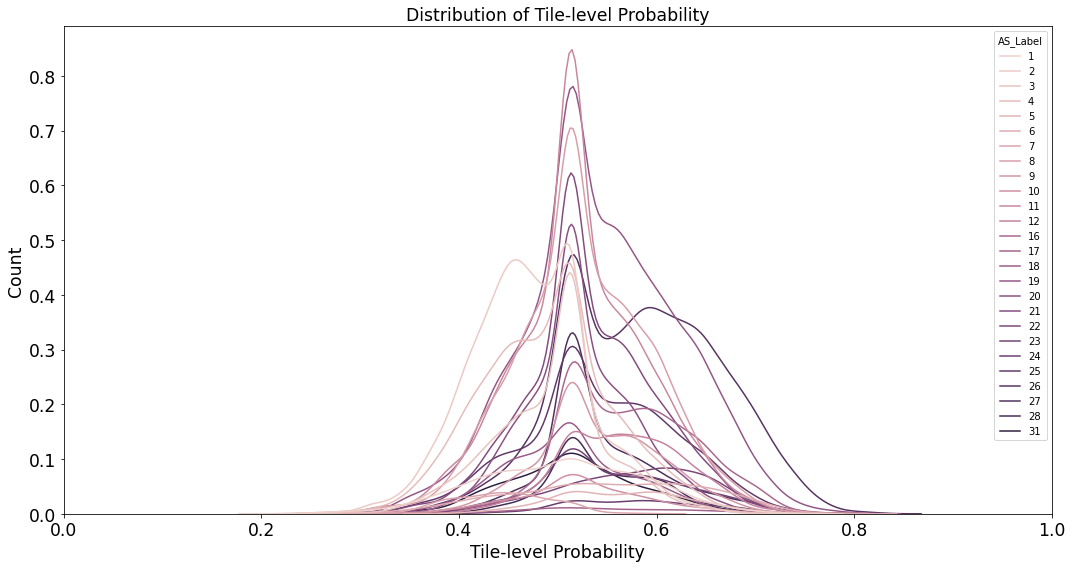

In [10]:
# kernel density estimation
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.kdeplot(data=merged_df[['tile_prob', 'AS_Label']], x='tile_prob', hue='AS_Label', ax=ax)
ax.set_title('Distribution of Tile-level Probability', fontsize='xx-large')
ax.set_xlabel('Tile-level Probability', fontsize='xx-large')
ax.set_ylabel('Count', fontsize='xx-large')
ax.tick_params(axis='both', which='major', labelsize='xx-large')
ax.set(xlim=(0.0, 1.0))
fig.tight_layout()

## 1-2. Distribution of Tile-level Probability per AS

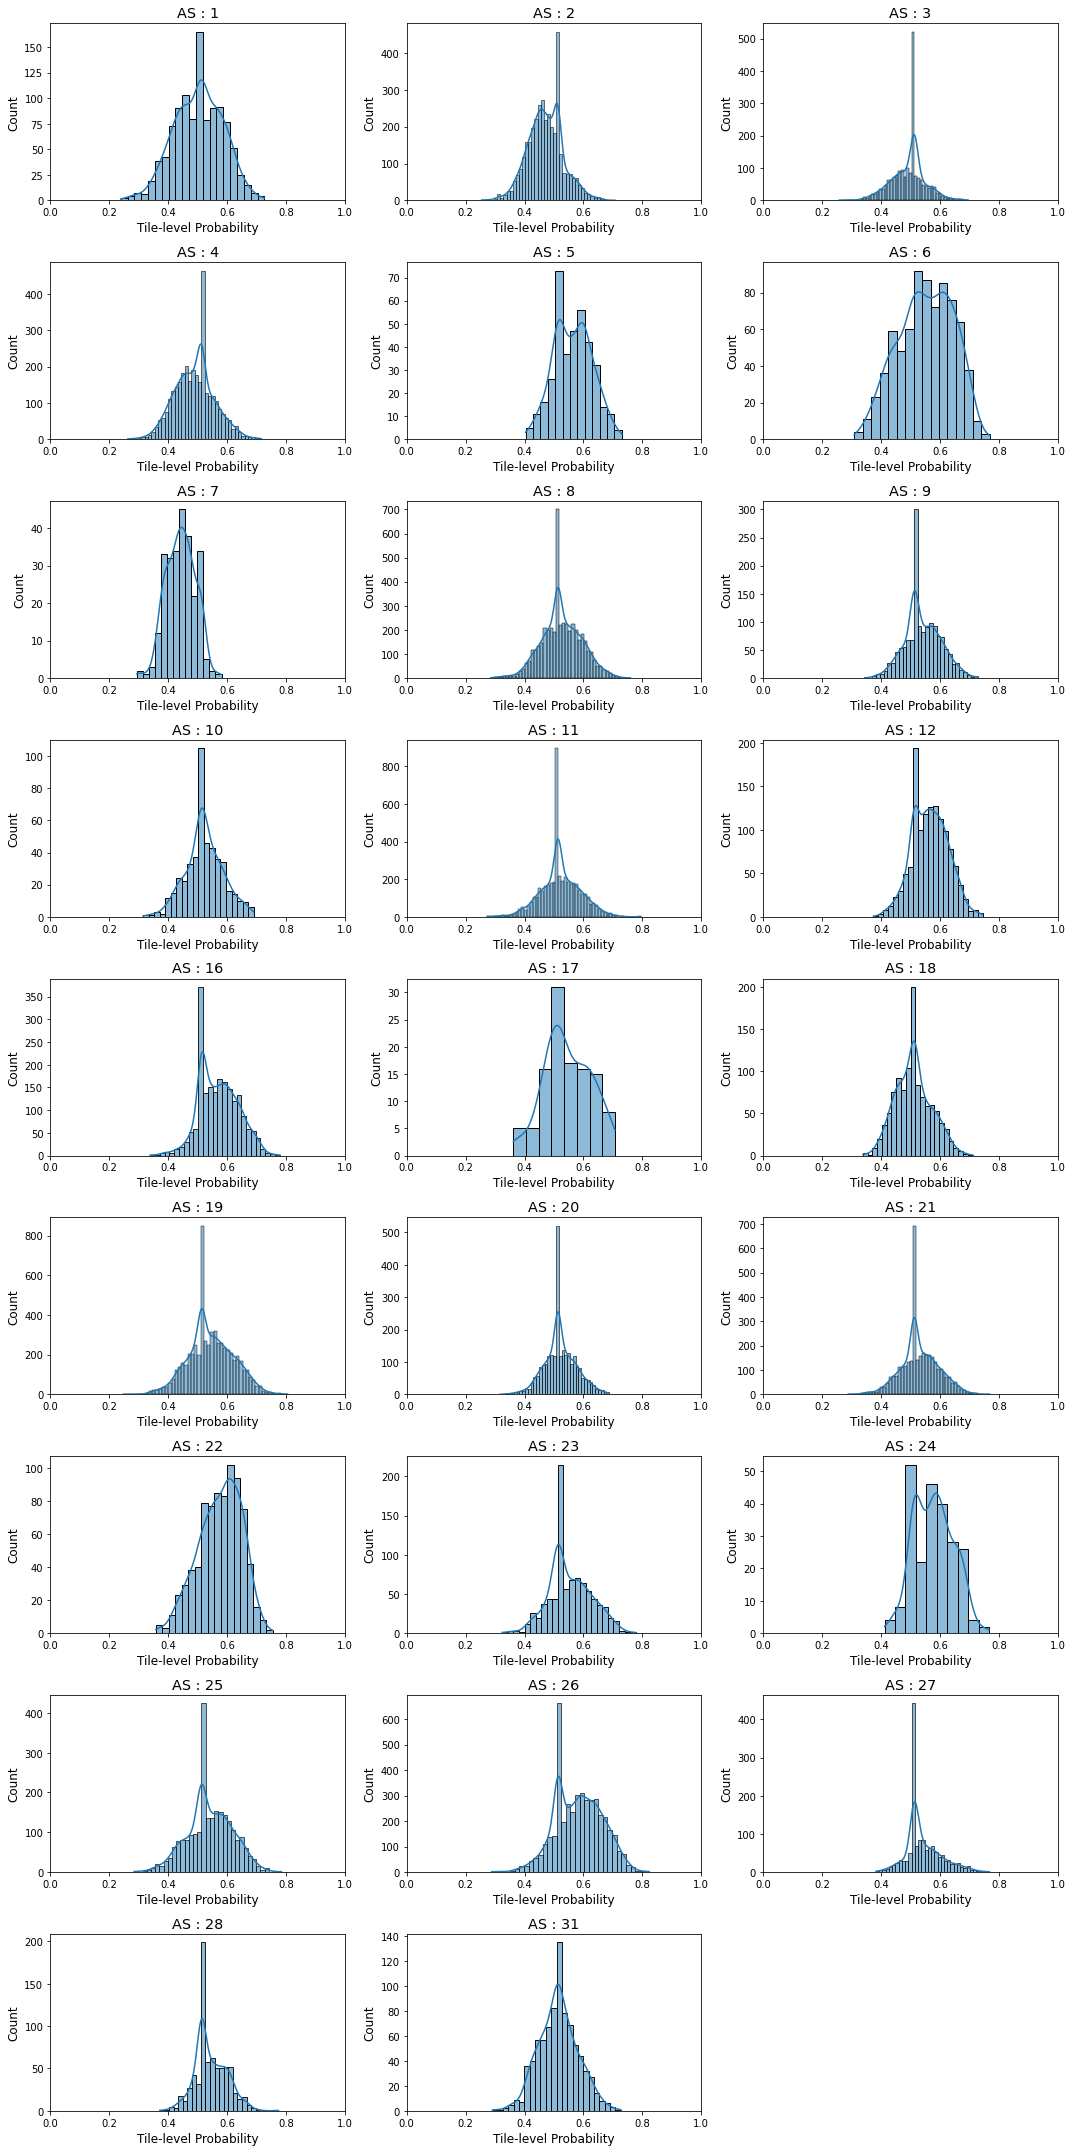

In [24]:
AS_list = np.unique(merged_df['AS_Label'])
fig, axes = plt.subplots(9, 3, figsize=(15, 30))
#fig.suptitle('Distribution of Tile-level Probability', fontsize='xx-large')
for i, AS in enumerate(AS_list):
    data = merged_df.loc[merged_df['AS_Label'] == AS]
    ax = axes[i // 3][i % 3]
    sns.histplot(data=data, x='tile_prob', kde=True, ax=ax)
    ax.set_title(f'AS : {AS}', fontsize='x-large')
    ax.set_xlabel('Tile-level Probability', fontsize='large')
    ax.set_ylabel('Count', fontsize='large')
    ax.tick_params(axis='both', which='major', labelsize='medium')
    ax.set(xlim=(0.0, 1.0))
fig.delaxes(axes[8][2])
fig.tight_layout()

## 1-3. Distribution of Tile-level Probabilities per Sample

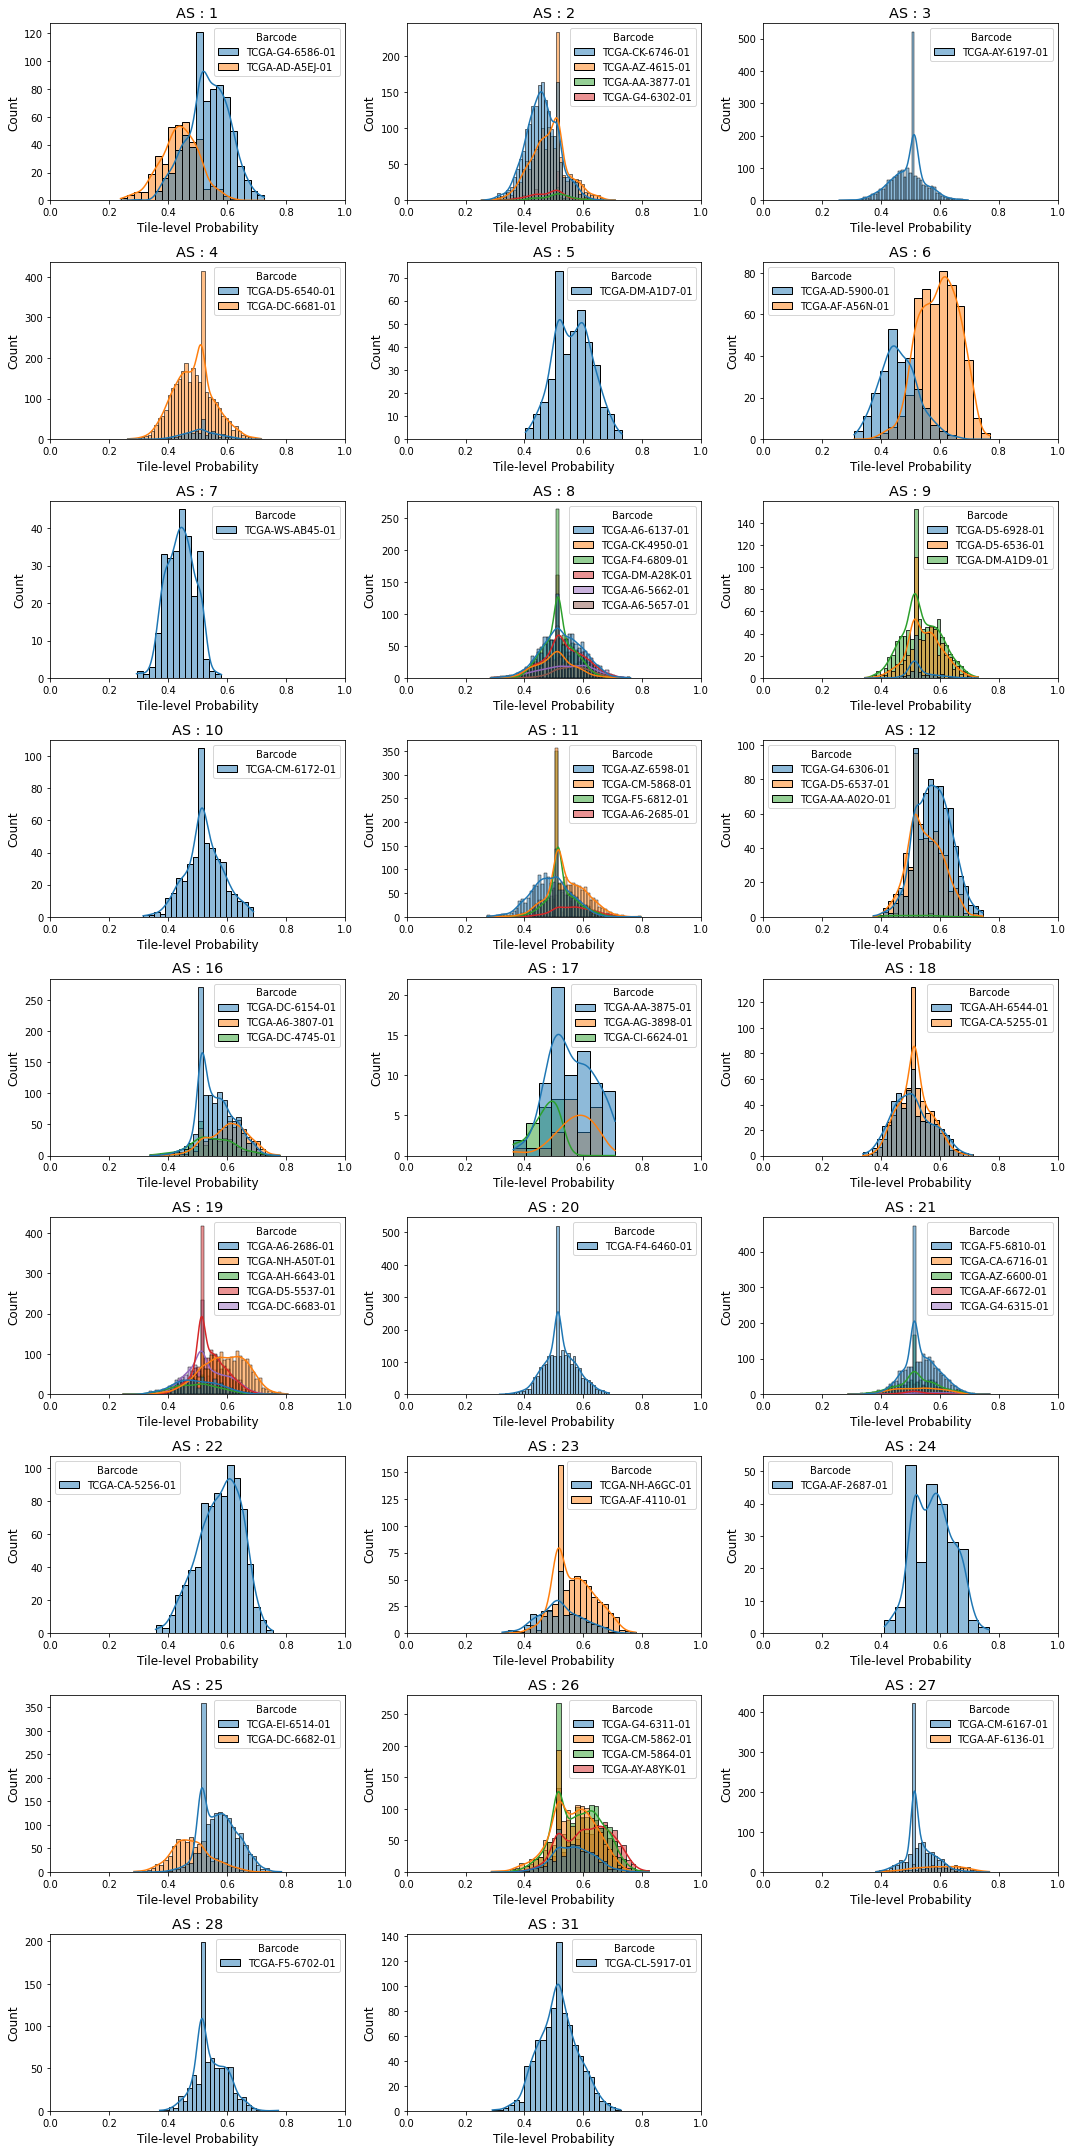

In [12]:
AS_list = np.unique(merged_df['AS_Label'])
fig, axes = plt.subplots(9, 3, figsize=(15, 30))
#fig.suptitle('Distribution of Tile-level Probability', fontsize='xx-large')
for i, AS in enumerate(AS_list):
    data = merged_df.loc[merged_df['AS_Label'] == AS][['tile_prob', 'Barcode']]
    ax = axes[i // 3][i % 3]
    sns.histplot(data=data, x='tile_prob', kde=True, hue='Barcode', ax=ax)
    ax.set_title(f'AS : {AS}', fontsize='x-large')
    ax.set_xlabel('Tile-level Probability', fontsize='large')
    ax.set_ylabel('Count', fontsize='large')
    ax.tick_params(axis='both', which='major', labelsize='medium')
    ax.set(xlim=(0.0, 1.0))
fig.delaxes(axes[8][2])
fig.tight_layout()

In [15]:
# distribution of tile_probs per AS
# AS_list = np.unique(tile_data['tile_AS'])
# for AS in AS_list:
#     data = tile_data.loc[tile_data['tile_AS'] == AS][['tile_prob', 'tile_AS']]
#     fig, ax = plt.subplots()
#     fig.set_size_inches(15, 8)
#     sns.histplot(data=data, x='tile_prob', kde=True, ax=ax)
#     ax.set_title(f'Distribution of Tile-level Probability (AS : {AS})', fontsize='xx-large')
#     ax.set_xlabel('Tile-level Probability', fontsize='xx-large')
#     ax.set_ylabel('Count', fontsize='xx-large')
#     ax.tick_params(axis='both', which='major', labelsize='xx-large')
#     ax.set(xlim=(0.0, 1.0))
#     fig.tight_layout()

## 1-4. Distribution of Tile-level Probabilities of Correct/Incorrect Samples

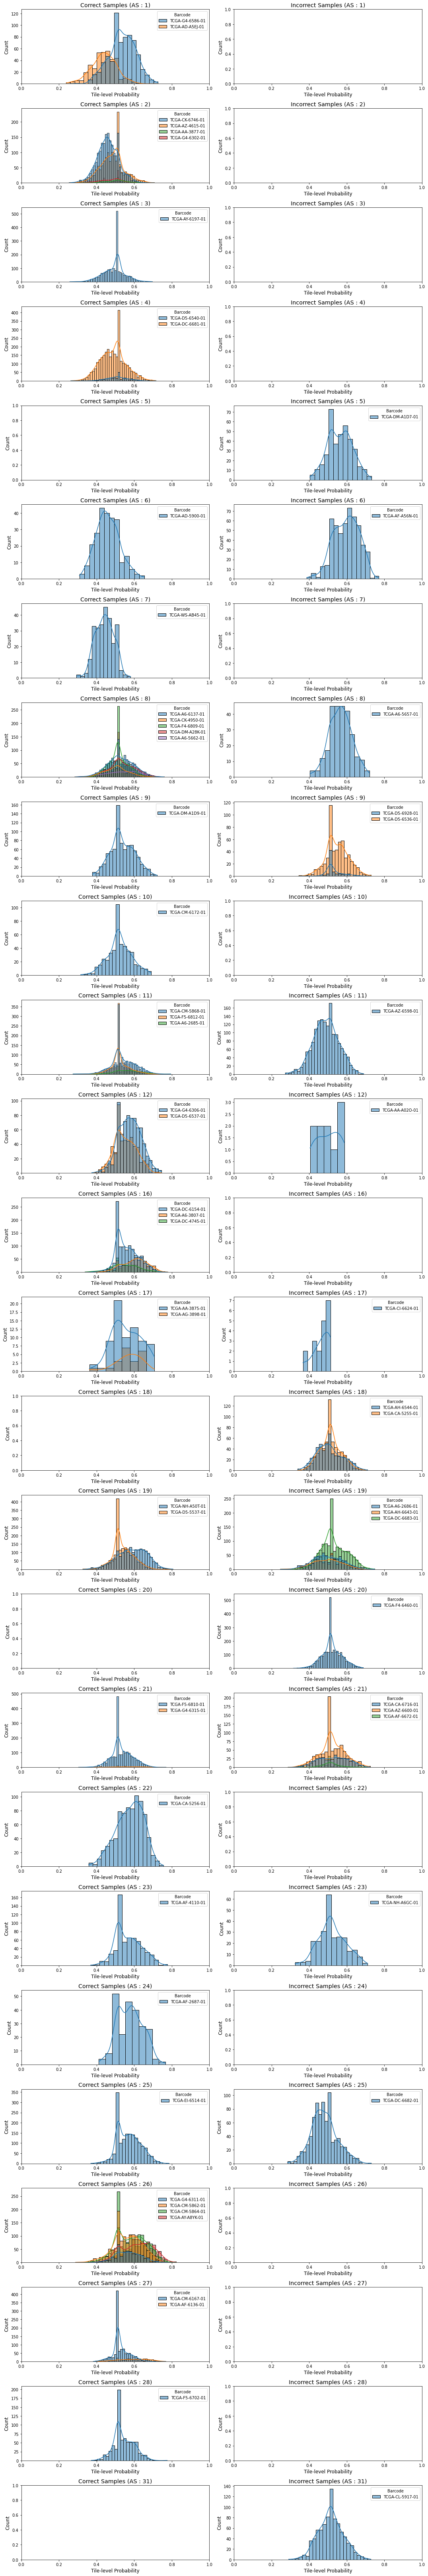

In [14]:
AS_list = np.unique(merged_df['AS_Label'])
fig, axes = plt.subplots(26, 2, figsize=(15, 90))
#fig.suptitle('Distribution of Tile-level Probability', fontsize='xx-large')
for i, AS in enumerate(AS_list):
    corrects = merged_df.loc[(merged_df['AS_Label'] == AS) & (merged_df['Pred'] == merged_df['True_Label'])]
    ax1 = axes[i][0]
    sns.histplot(data=corrects, x='tile_prob', kde=True, hue='Barcode', ax=ax1)
    ax1.set_title(f'Correct Samples (AS : {AS})', fontsize='x-large')
    ax1.set_xlabel('Tile-level Probability', fontsize='large')
    ax1.set_ylabel('Count', fontsize='large')
    ax1.tick_params(axis='both', which='major', labelsize='medium')
    ax1.set(xlim=(0.0, 1.0))

    incorrects = merged_df.loc[(merged_df['AS_Label'] == AS) & (merged_df['Pred'] != merged_df['True_Label'])]
    ax2 = axes[i][1]
    sns.histplot(data=incorrects, x='tile_prob', kde=True, hue='Barcode', ax=ax2)
    ax2.set_title(f'Incorrect Samples (AS : {AS})', fontsize='x-large')
    ax2.set_xlabel('Tile-level Probability', fontsize='large')
    ax2.set_ylabel('Count', fontsize='large')
    ax2.tick_params(axis='both', which='major', labelsize='medium')   
    ax2.set(xlim=(0.0, 1.0))

fig.tight_layout()

## 1-5. AS Histogram of Correctly/Incorrectly Predicted Samples

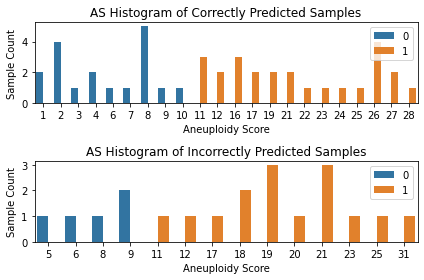

In [22]:
corrects = sample_data.loc[sample_data['Pred']==sample_data['True_Label']]
fig, axes = plt.subplots(2)
sns.countplot(ax=axes[0], x='AS_Label', data=corrects, hue='True_Label')
axes[0].set_title('AS Histogram of Correctly Predicted Samples')
axes[0].set_xlabel('Aneuploidy Score')
axes[0].set_ylabel('Sample Count')
axes[0].legend()

incorrects = sample_data.loc[sample_data['Pred']!=sample_data['True_Label']]
sns.countplot(ax=axes[1], x='AS_Label', data=incorrects, hue='True_Label')
axes[1].set_title('AS Histogram of Incorrectly Predicted Samples')
axes[1].set_xlabel('Aneuploidy Score')
axes[1].set_ylabel('Sample Count')
axes[1].legend()

fig.tight_layout()

In [15]:
# AS_list = np.unique(merged_df['AS_Label'])
# for AS in AS_list:
#     data = merged_df.loc[merged_df['AS_Label'] == AS][['tile_prob', 'correct']]
#     fig, ax = plt.subplots()
#     fig.set_size_inches(15, 8)
#     sns.histplot(data=data, x='tile_prob', hue='correct', kde=True, ax=ax)
#     ax.set_title(f'Distribution of Tile-level Probability (AS : {AS})', fontsize='xx-large')
#     ax.set_xlabel('Tile-level Probability', fontsize='xx-large')
#     ax.set_ylabel('Count', fontsize='xx-large')
#     ax.tick_params(axis='both', which='major', labelsize='xx-large')
#     ax.set(xlim=(0.0, 1.0))
#     fig.tight_layout()

In [ ]:
# add text : sample name(barcode), whether prediction was right or wrong
# for AS in AS_list:
#     barcodes = sample_data.loc[sample_data['AS_Label'] == AS, 'Barcode'].to_list()
#     for barcode in barcodes:
#         data = tile_data.loc[tile_data['tile_path'].str.contains(barcode, case=False)][['tile_prob', 'tile_AS']]
#         fig, ax = plt.subplots()
#         fig.set_size_inches(15, 8)
#         sns.histplot(data=data, x='tile_prob', hue='tile_AS', kde=True, ax=ax)
#         ax.set_title(f'Distribution of Tile-level Probability (AS : {AS})', fontsize='xx-large')
#         ax.set_xlabel('Tile-level Probability', fontsize='xx-large')
#         ax.set_ylabel('Count', fontsize='xx-large')
#         ax.tick_params(axis='both', which='major', labelsize='xx-large')
#         ax.set(xlim=(0.0, 1.0))
#         fig.tight_layout()
        

In [ ]:
# scipy jenson-shannon divergence as distance metric btw sample distributions ?

# 2. AS 1-20, 21-39

In [2]:
tile_data = pd.read_csv('./saved/log/CRC_Densenet121_AS(1-20,21-39)_MSS+MSIMUT/0103_064448/tile_data.csv')
tile_data.head()

Unnamed: 0                                          tile_path  tile_prob  \
0           0  data/CRC/Test/16/blk-FKWQLSWNGMTC-TCGA-DC-6154...   0.556955   
1           1  data/CRC/Test/2/blk-VICMWNRFLNCK-TCGA-CK-6746-...   0.437166   
2           2  data/CRC/Test/19/blk-VCWEAVTQTRHY-TCGA-A6-2686...   0.554735   
3           3  data/CRC/Test/3/blk-RRPRDCDETECN-TCGA-AY-6197-...   0.326067   
4           4  data/CRC/Test/1/blk-QWPWRNYNDWVN-TCGA-G4-6586-...   0.419762   

   tile_pred  tile_label  tile_AS  
0        1.0           0     16.0  
1        0.0           0      2.0  
2        1.0           0     19.0  
3        0.0           0      3.0  
4        0.0           0      1.0

In [3]:
sample_data = pd.read_csv('./saved/log/CRC_Densenet121_AS(1-10,11-39)_MSS+MSIMUT/0103_063307/sample_df(score: votes).csv')
# sample_data = pd.read_csv('./saved/log/CRC_Densenet121_AS(1-20,21-39)_MSS+MSIMUT/0103_064448/sample_df(score: votes).csv')
sample_data.head()

Unnamed: 0          Barcode  AS_Label  Tile_Num     votes  Pred  True_Label
0           0  TCGA-DC-6154-01        16      1112  0.923561     1           1
1           1  TCGA-CK-6746-01         2      1906  0.241343     0           0
2           2  TCGA-A6-2686-01        19       667  0.473763     0           1
3           3  TCGA-AY-6197-01         3      1997  0.545819     0           0
4           4  TCGA-G4-6586-01         1       695  0.742446     0           0

In [4]:
# Extract barcode from tile path

tile_data['Barcode'] = tile_data['tile_path'].apply(os.path.basename)
tile_data['Barcode'] = tile_data['Barcode'].apply(lambda x : x[17:32])
tile_data.head()

Unnamed: 0                                          tile_path  tile_prob  \
0           0  data/CRC/Test/16/blk-FKWQLSWNGMTC-TCGA-DC-6154...   0.556955   
1           1  data/CRC/Test/2/blk-VICMWNRFLNCK-TCGA-CK-6746-...   0.437166   
2           2  data/CRC/Test/19/blk-VCWEAVTQTRHY-TCGA-A6-2686...   0.554735   
3           3  data/CRC/Test/3/blk-RRPRDCDETECN-TCGA-AY-6197-...   0.326067   
4           4  data/CRC/Test/1/blk-QWPWRNYNDWVN-TCGA-G4-6586-...   0.419762   

   tile_pred  tile_label  tile_AS          Barcode  
0        1.0           0     16.0  TCGA-DC-6154-01  
1        0.0           0      2.0  TCGA-CK-6746-01  
2        1.0           0     19.0  TCGA-A6-2686-01  
3        0.0           0      3.0  TCGA-AY-6197-01  
4        0.0           0      1.0  TCGA-G4-6586-01

In [5]:
merged_df = pd.merge(tile_data, sample_data,  how='left', left_on=['Barcode'], right_on = ['Barcode'])
merged_df.drop(labels=['Unnamed: 0_x', 'Unnamed: 0_y', 'tile_path', 'tile_AS'], axis=1, inplace=True)
merged_df['correct'] = np.where(merged_df['Pred'] == merged_df['True_Label'], True, False)
merged_df.head()

tile_prob  tile_pred  tile_label          Barcode  AS_Label  Tile_Num  \
0   0.556955        1.0           0  TCGA-DC-6154-01        16      1112   
1   0.437166        0.0           0  TCGA-CK-6746-01         2      1906   
2   0.554735        1.0           0  TCGA-A6-2686-01        19       667   
3   0.326067        0.0           0  TCGA-AY-6197-01         3      1997   
4   0.419762        0.0           0  TCGA-G4-6586-01         1       695   

      votes  Pred  True_Label  correct  
0  0.923561     1           1     True  
1  0.241343     0           0     True  
2  0.473763     0           1    False  
3  0.545819     0           0     True  
4  0.742446     0           0     True

## 2-1. Distribution of Tile-level Probability

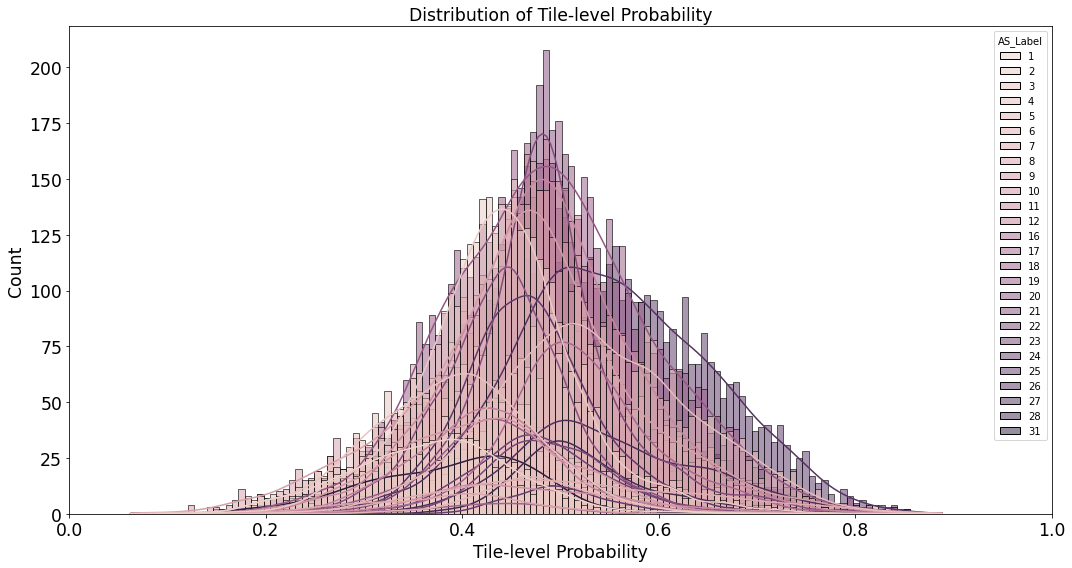

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.histplot(data=merged_df[['tile_prob', 'AS_Label']], x='tile_prob', hue='AS_Label', kde=True, ax=ax)
ax.set_title('Distribution of Tile-level Probability', fontsize='xx-large')
ax.set_xlabel('Tile-level Probability', fontsize='xx-large')
ax.set_ylabel('Count', fontsize='xx-large')
ax.tick_params(axis='both', which='major', labelsize='xx-large')
ax.set(xlim=(0.0, 1.0))
fig.tight_layout()

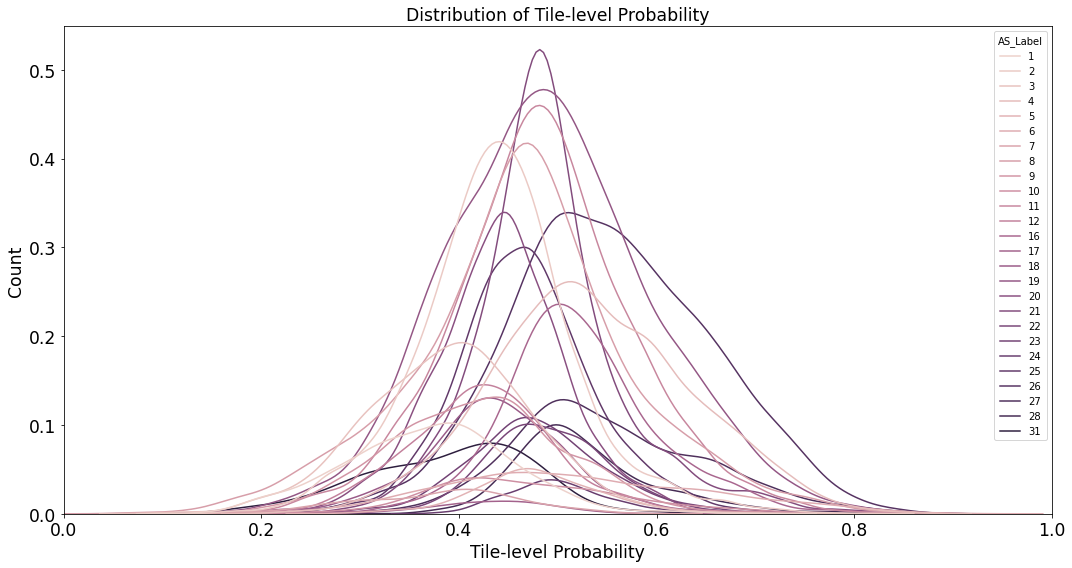

In [30]:
# kernel density estimation
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.kdeplot(data=merged_df[['tile_prob', 'AS_Label']], x='tile_prob', hue='AS_Label', ax=ax)
ax.set_title('Distribution of Tile-level Probability', fontsize='xx-large')
ax.set_xlabel('Tile-level Probability', fontsize='xx-large')
ax.set_ylabel('Count', fontsize='xx-large')
ax.tick_params(axis='both', which='major', labelsize='xx-large')
ax.set(xlim=(0.0, 1.0))
fig.tight_layout()

## 2-2. Distribution of Tile-level Probability per AS

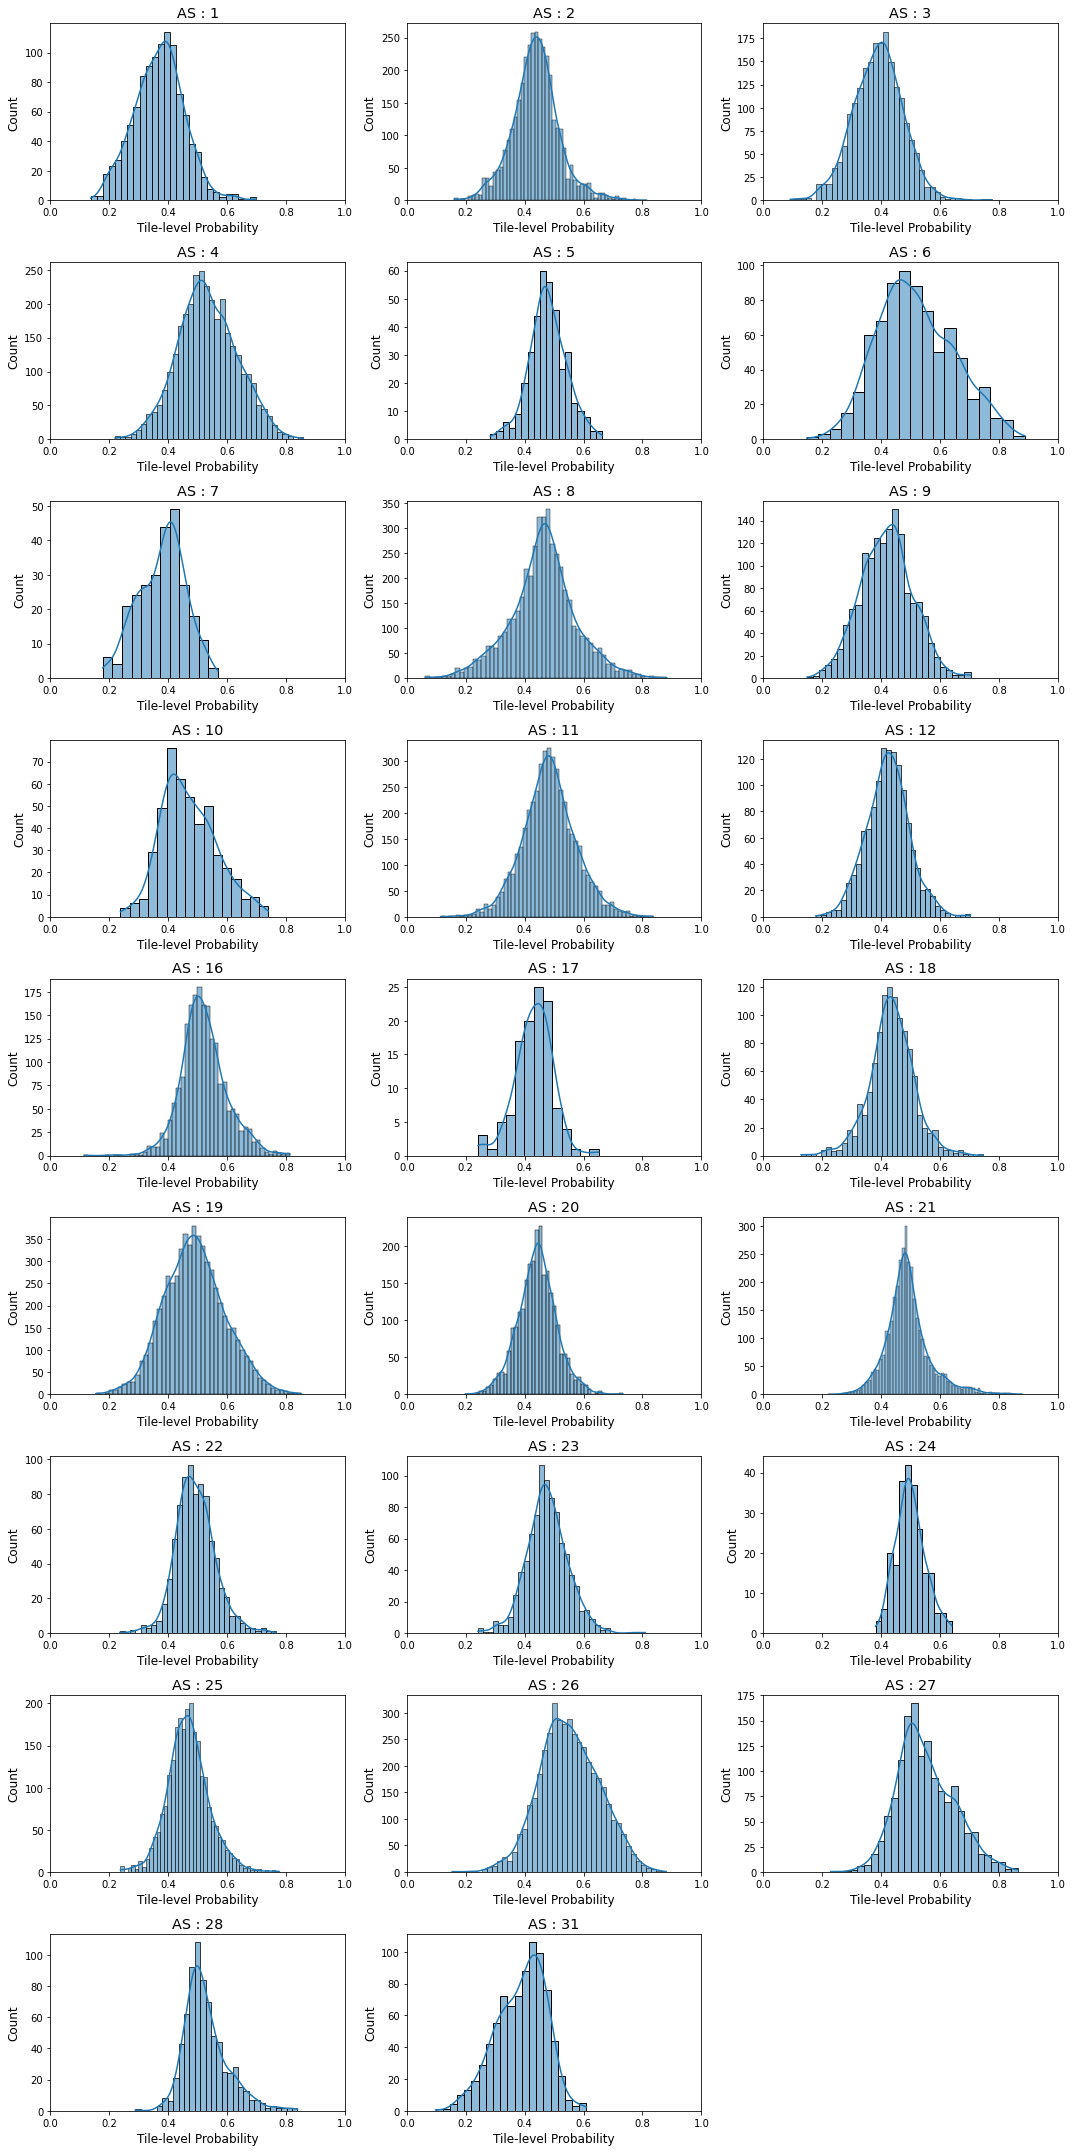

In [31]:
AS_list = np.unique(merged_df['AS_Label'])
fig, axes = plt.subplots(9, 3, figsize=(15, 30))
#fig.suptitle('Distribution of Tile-level Probability', fontsize='xx-large')
for i, AS in enumerate(AS_list):
    data = merged_df.loc[merged_df['AS_Label'] == AS]
    ax = axes[i // 3][i % 3]
    sns.histplot(data=data, x='tile_prob', kde=True, ax=ax)
    ax.set_title(f'AS : {AS}', fontsize='x-large')
    ax.set_xlabel('Tile-level Probability', fontsize='large')
    ax.set_ylabel('Count', fontsize='large')
    ax.tick_params(axis='both', which='major', labelsize='medium')
    ax.set(xlim=(0.0, 1.0))
fig.delaxes(axes[8][2])
fig.tight_layout()

## 2-3. Distribution of Tile-level Probabilities per Sample

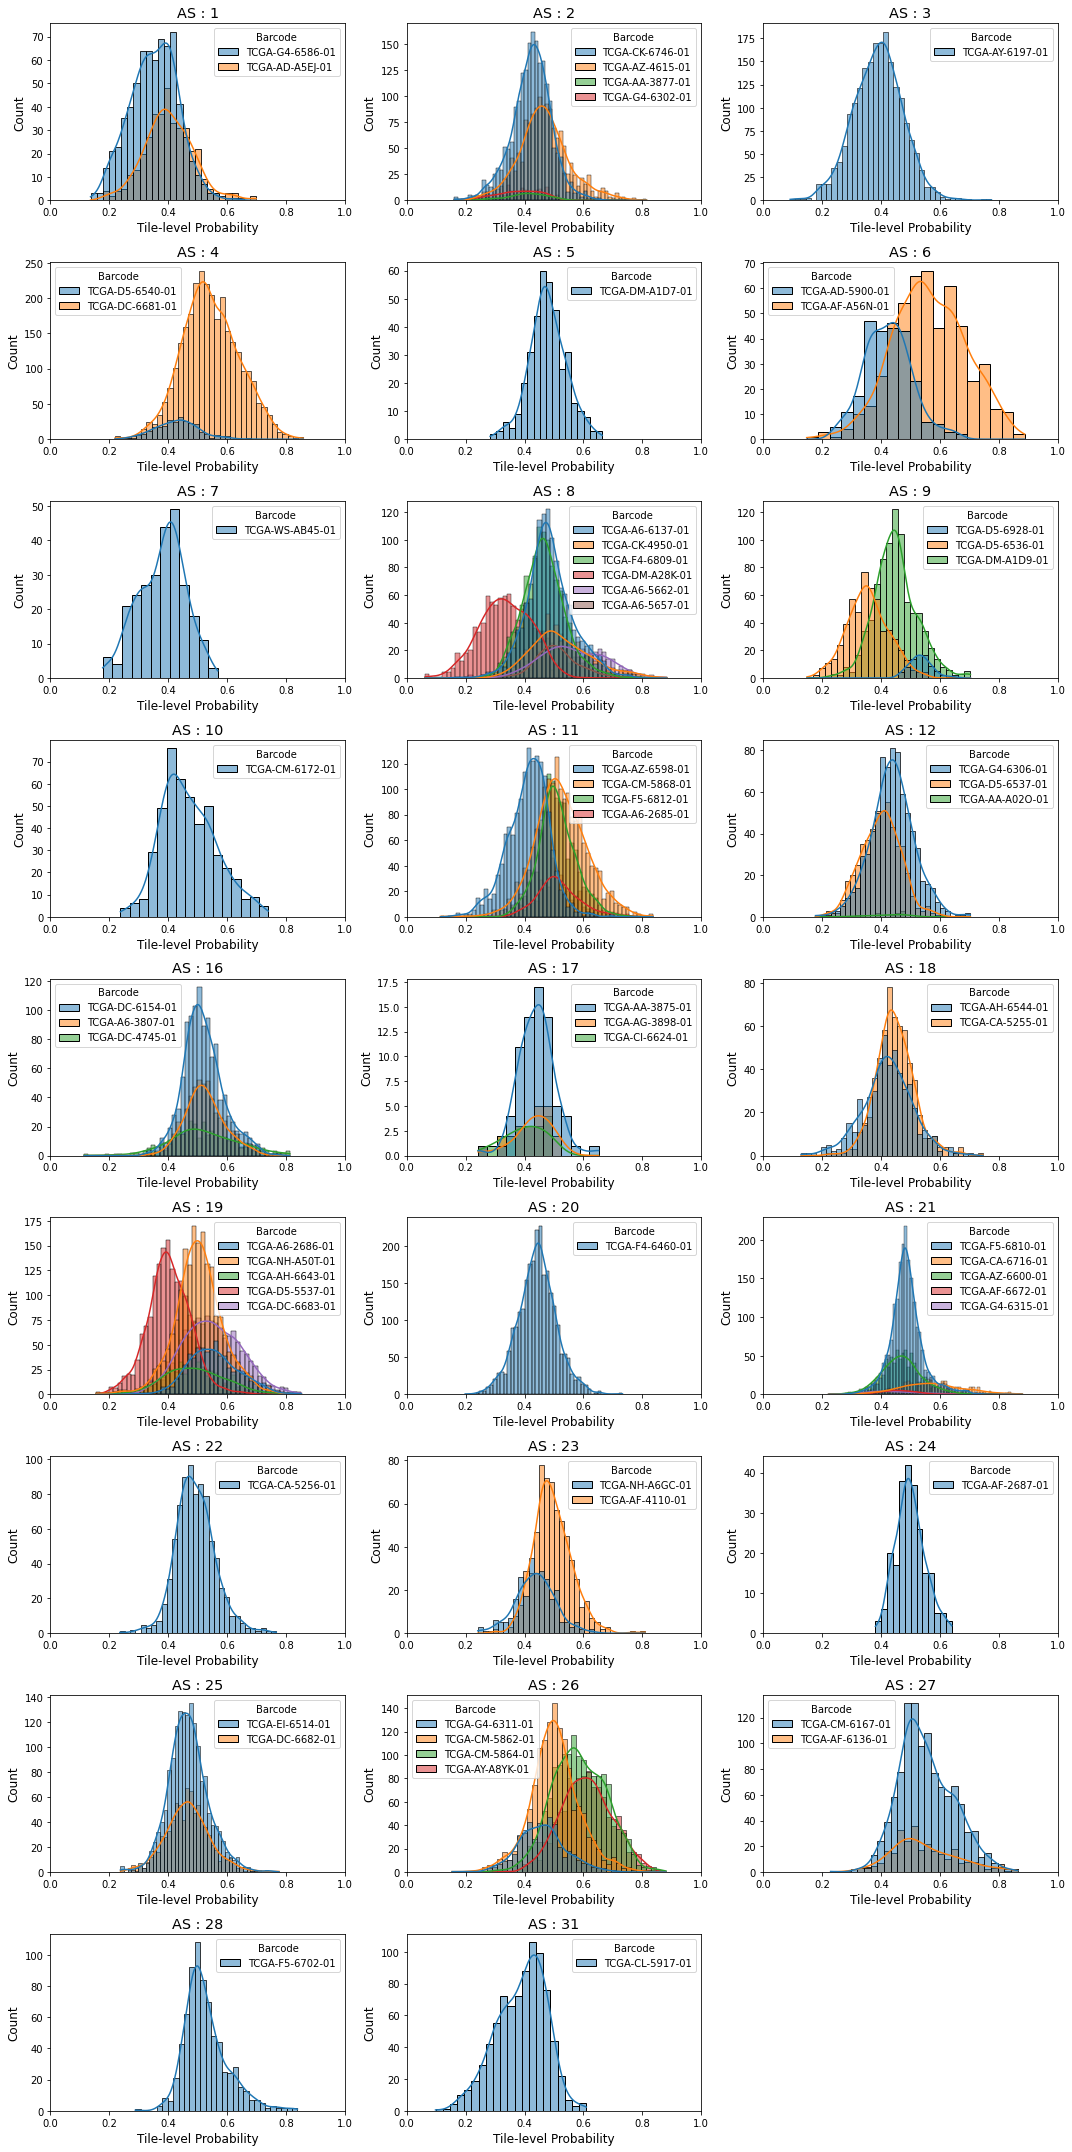

In [32]:
AS_list = np.unique(merged_df['AS_Label'])
fig, axes = plt.subplots(9, 3, figsize=(15, 30))
#fig.suptitle('Distribution of Tile-level Probability', fontsize='xx-large')
for i, AS in enumerate(AS_list):
    data = merged_df.loc[merged_df['AS_Label'] == AS][['tile_prob', 'Barcode']]
    ax = axes[i // 3][i % 3]
    sns.histplot(data=data, x='tile_prob', kde=True, hue='Barcode', ax=ax)
    ax.set_title(f'AS : {AS}', fontsize='x-large')
    ax.set_xlabel('Tile-level Probability', fontsize='large')
    ax.set_ylabel('Count', fontsize='large')
    ax.tick_params(axis='both', which='major', labelsize='medium')
    ax.set(xlim=(0.0, 1.0))
fig.delaxes(axes[8][2])
fig.tight_layout()

## 2-4. Distribution of Tile-level Probabilities of Correct/Incorrect Samples

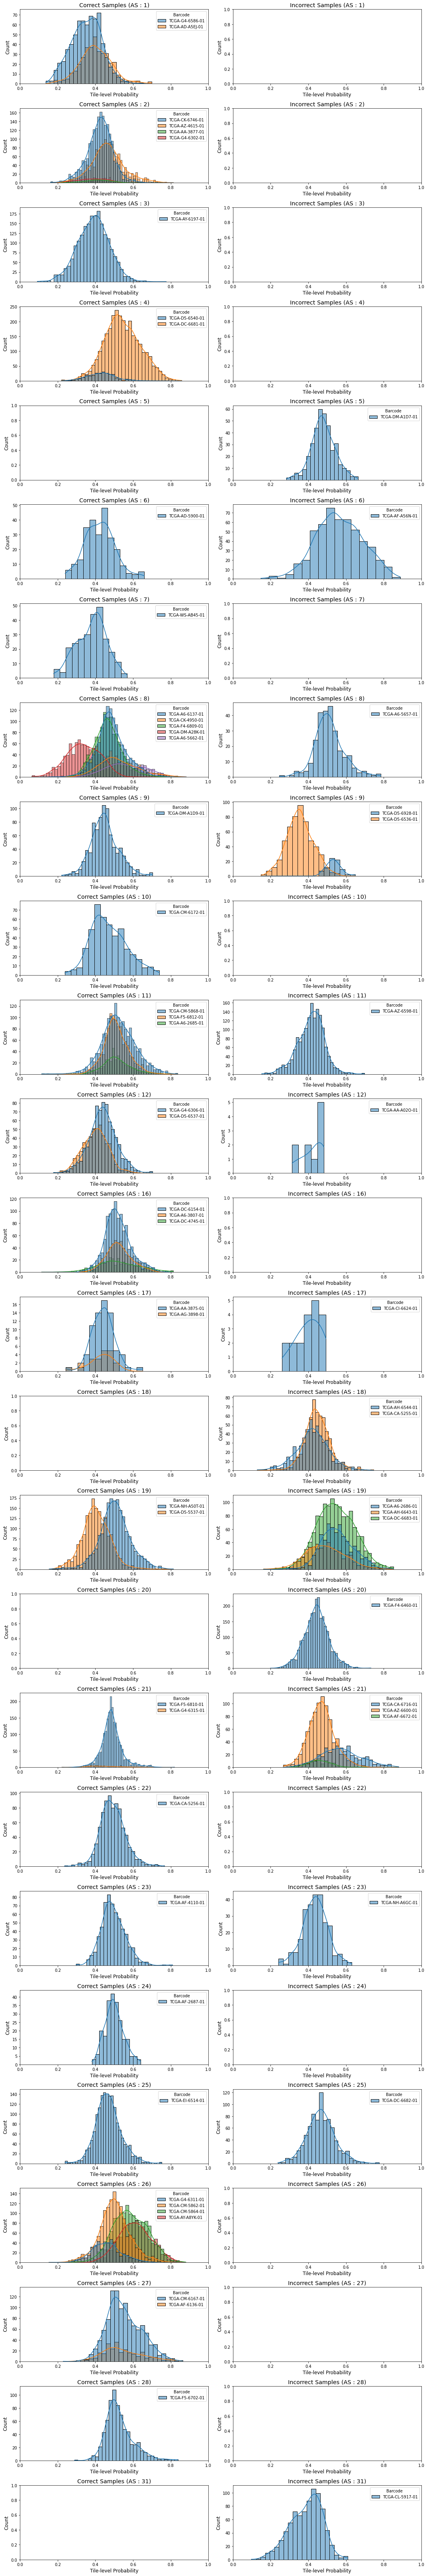

In [33]:
AS_list = np.unique(merged_df['AS_Label'])
fig, axes = plt.subplots(26, 2, figsize=(15, 90))
#fig.suptitle('Distribution of Tile-level Probability', fontsize='xx-large')
for i, AS in enumerate(AS_list):
    corrects = merged_df.loc[(merged_df['AS_Label'] == AS) & (merged_df['Pred'] == merged_df['True_Label'])]
    ax1 = axes[i][0]
    sns.histplot(data=corrects, x='tile_prob', kde=True, hue='Barcode', ax=ax1)
    ax1.set_title(f'Correct Samples (AS : {AS})', fontsize='x-large')
    ax1.set_xlabel('Tile-level Probability', fontsize='large')
    ax1.set_ylabel('Count', fontsize='large')
    ax1.tick_params(axis='both', which='major', labelsize='medium')
    ax1.set(xlim=(0.0, 1.0))

    incorrects = merged_df.loc[(merged_df['AS_Label'] == AS) & (merged_df['Pred'] != merged_df['True_Label'])]
    ax2 = axes[i][1]
    sns.histplot(data=incorrects, x='tile_prob', kde=True, hue='Barcode', ax=ax2)
    ax2.set_title(f'Incorrect Samples (AS : {AS})', fontsize='x-large')
    ax2.set_xlabel('Tile-level Probability', fontsize='large')
    ax2.set_ylabel('Count', fontsize='large')
    ax2.tick_params(axis='both', which='major', labelsize='medium')   
    ax2.set(xlim=(0.0, 1.0))

fig.tight_layout()

## 2-5. AS Histogram of Correctly/Incorrectly Predicted Samples

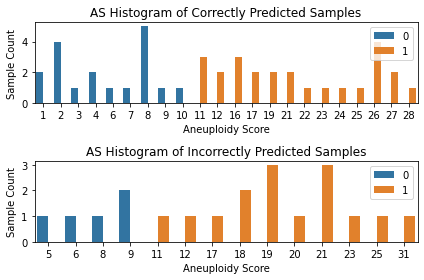

In [34]:
corrects = sample_data.loc[sample_data['Pred']==sample_data['True_Label']]
fig, axes = plt.subplots(2)
sns.countplot(ax=axes[0], x='AS_Label', data=corrects, hue='True_Label')
axes[0].set_title('AS Histogram of Correctly Predicted Samples')
axes[0].set_xlabel('Aneuploidy Score')
axes[0].set_ylabel('Sample Count')
axes[0].legend()

incorrects = sample_data.loc[sample_data['Pred']!=sample_data['True_Label']]
sns.countplot(ax=axes[1], x='AS_Label', data=incorrects, hue='True_Label')
axes[1].set_title('AS Histogram of Incorrectly Predicted Samples')
axes[1].set_xlabel('Aneuploidy Score')
axes[1].set_ylabel('Sample Count')
axes[1].legend()

fig.tight_layout()